## AccelerateAI - Time Series Analysis and Forecasting

### Time Series Decomposition

In [1]:
import pandas as pd 

from statsmodels.tsa.seasonal import seasonal_decompose, STL

import matplotlib as mpl
mpl.rc("figure", figsize=(10,8))
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
airpassenger = pd.read_csv("air_passenger.csv", parse_dates=True)
airpassenger.head()

,Date,DOMESTIC
0,Jan-2003,43032450.0
1,Feb-2003,41166780.0
2,Mar-2003,49992700.0
3,Apr-2003,47033260.0
4,May-2003,49152352.0


<AxesSubplot:>

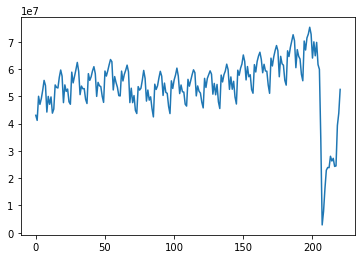

In [3]:
airpassenger.DOMESTIC.plot()

### 1. Classical Decomposition

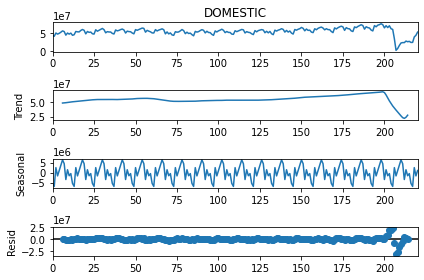

In [5]:
result = seasonal_decompose(airpassenger.DOMESTIC, period=12)
fig = result.plot()

Holt Winter's Exponential Smoothing

### 2. STL decomposition 

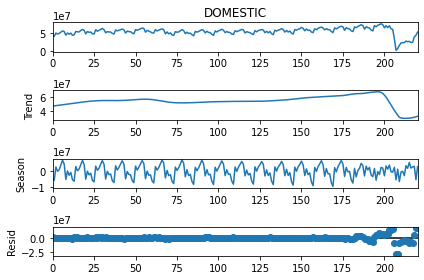

In [7]:
stl = STL(airpassenger.DOMESTIC, period=12).fit()
fig = stl.plot()

In [18]:
# Individual Components
stl.trend.head() , stl.seasonal.head(), stl.resid.head()

(0    4.693400e+07
 1    4.723525e+07
 2    4.753841e+07
 3    4.784282e+07
 4    4.814797e+07
 Name: trend, dtype: float64,
 0   -5.106882e+06
 1   -5.883098e+06
 2    2.708774e+06
 3   -2.477773e+04
 4    9.264497e+05
 Name: season, dtype: float64,
 0    1.205331e+06
 1   -1.853759e+05
 2   -2.544874e+05
 3   -7.847793e+05
 4    7.793252e+04
 Name: resid, dtype: float64)

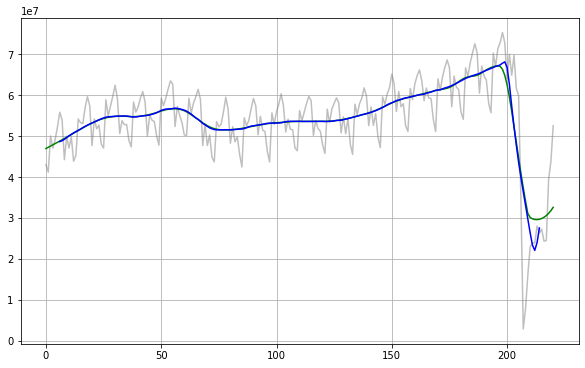

In [19]:
# How well does the trend fit the data?
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(airpassenger.DOMESTIC, color='.5', alpha=.5)
ax.plot(stl.trend, color='g')
ax.plot(result.trend, color='b')       #classical decomposition
ax.grid()

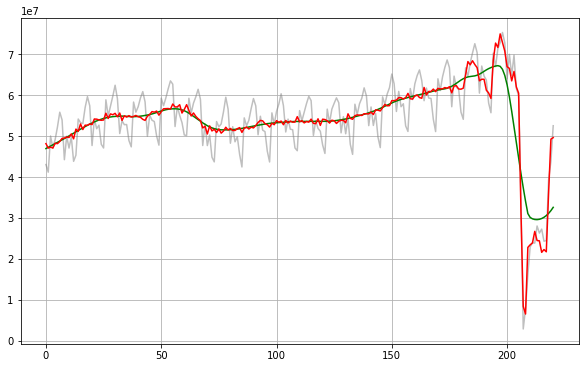

In [20]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(airpassenger.DOMESTIC, color='.5', alpha=.5)
ax.plot(stl.trend, color='g')
ax.plot(airpassenger.DOMESTIC - stl.seasonal, color='r')
ax.grid()